# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
estaticos_market = pd.read_csv('estaticos_market.csv', index_col=0)
estaticos_market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
print("We have {} firms".format(estaticos_market.shape[0])+" and {} attributes"
      .format(estaticos_market.shape[1]))

We have 462298 firms and 181 attributes


In [4]:
list(estaticos_market.columns)

['id',
 'fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_empresa_anos',
 'idade_emp_cat',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'fl_optante_simples',
 'qt_art',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'de_indicador_telefone',
 'fl_simples_irregular',
 'vl_frota',
 'empsetorcensitariofaixarendapopulacao',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_medi

In [5]:
estaticos_market.dtypes.value_counts()

float64    144
object      27
bool         9
int64        1
dtype: int64

                                     types     missing
qt_alteracao_socio_total           float64  100.000000
qt_alteracao_socio_90d             float64  100.000000
grau_instrucao_macro_desconhecido  float64  100.000000
qt_alteracao_socio_180d            float64  100.000000
qt_alteracao_socio_365d            float64  100.000000
coligada_mais_antiga_baixada       float64   99.970582
coligada_mais_nova_baixada         float64   99.970582
idade_media_coligadas_baixadas     float64   99.970582
vl_total_veiculos_antt             float64   99.961929
vl_total_tancagem                  float64   99.939433


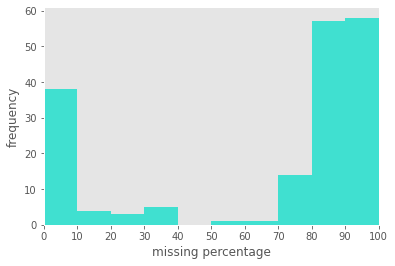

In [6]:
#Missing values
missing = pd.DataFrame({'types':estaticos_market.dtypes,
                    'missing':((estaticos_market.isna().sum()/estaticos_market.shape[0])*100)})

print(missing.sort_values(by='missing', ascending=False).head(10))

plt.style.use('ggplot')
plt.grid(False)
plt.hist(missing['missing'], bins=10, color='turquoise')
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.xlabel('missing percentage')
plt.ylabel('frequency');

In [7]:
#Removing variables with more than 50% of missing values
def remove_missing(data):
    aux = {'columns': data.columns, 'missing': ((data.isna().sum() / data.shape[0]) * 100)}
    missing_values = pd.DataFrame.from_dict(aux)
    cut = missing_values[missing_values['missing'] > 50]
    cols_to_drop = list(cut['columns'])
    data.drop(cols_to_drop, axis=1, inplace=True)
    return data

#Removing unnecessary columns
def drop_unnecessary(data):
        data.drop(['fl_telefone', 'de_saude_rescencia', 'nu_meses_rescencia',
                    'fl_email'], axis=1, inplace=True)
        return data

In [8]:
data = remove_missing(estaticos_market)
data.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,0.0,44.0,47.0,41.0,2.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,0.0,27.0,27.0,27.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,0.0,32.0,32.0,32.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,0.0,36.0,36.0,36.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,0.0,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


In [9]:
data = drop_unnecessary(data)
data.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,0.0,44.0,47.0,41.0,2.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,0.0,27.0,27.0,27.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,0.0,32.0,32.0,32.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,0.0,36.0,36.0,36.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,0.0,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


In [10]:
print("Now we have {} firms".format(data.shape[0])+" and {} attributes"
      .format(data.shape[1]))

Now we have 462298 firms and 46 attributes


#### Let us explore these 46 attributes

#### <ins>Firms types - MEI, ME, LTDA, EPP, SA</ins>

- There are no EPP firms: column 'fl_epp' is all False;
- There are almost 100 times more firms that are not ME than firms that are MEI: 'fl_me' has almost 100 times more False than True values;
- The differences between 'fl_ltda' and 'fl_sa' is due to the capital of the partners;
- There are only 68 True values in 'fl_st_especial'. It means that, for those firms whose value is True, some extraordinary situation is identified by the IRS.

In [11]:
types = data[['fl_sa', 'fl_ltda', 'fl_mei', 'fl_optante_simei', 'fl_optante_simples',
             'fl_epp', 'fl_me', 'fl_st_especial', 'qt_filiais', 'fl_matriz']]

# How many "optante_simei" are "fl_mei"?
aux = types[types['fl_optante_simei'] == True]
print(aux.fl_mei.value_counts())

print('-------------------------------------')

# How many "fl_simei" are "fl_optante_simples"?
aux = types[types['fl_mei'] == True]
print(aux.fl_optante_simples.value_counts())

# How many 'fl_st_especial' are True?
data['fl_st_especial'].value_counts()

True     92369
False     1671
Name: fl_mei, dtype: int64
-------------------------------------
True     94688
False     2045
Name: fl_optante_simples, dtype: int64


False    462230
True         68
Name: fl_st_especial, dtype: int64

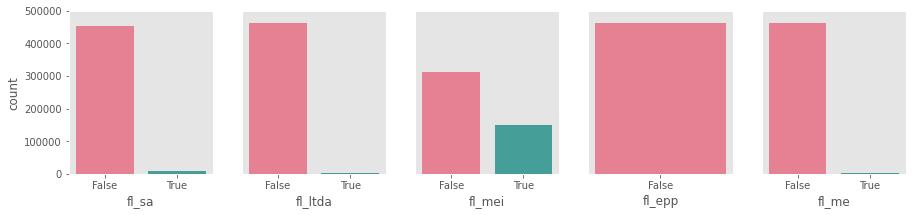

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
plt.grid(False)
sns.countplot(data['fl_sa'], palette="husl")
plt.ylim(0,500000)

plt.subplot(1,5,2)
plt.grid(False)
sns.countplot(data['fl_ltda'], palette="husl")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,3)
plt.grid(False)
sns.countplot(data['fl_mei'], palette="husl")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,4)
plt.grid(False)
sns.countplot(data['fl_epp'], palette="husl")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,5)
plt.grid(False)
sns.countplot(data['fl_me'], palette="husl")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.show()

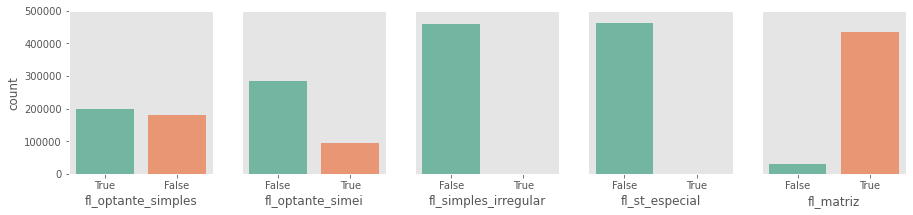

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
plt.grid(False)
sns.countplot(data['fl_optante_simples'], palette="Set2")
plt.ylim(0,500000)

plt.subplot(1,5,2)
plt.grid(False)
sns.countplot(data['fl_optante_simei'], palette="Set2")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,3)
plt.grid(False)
sns.countplot(data['fl_simples_irregular'], palette="Set2")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,4)
plt.grid(False)
sns.countplot(data['fl_st_especial'], palette="Set2")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,5)
plt.grid(False)
sns.countplot(data['fl_matriz'], palette="Set2")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("");

In [14]:
data['qt_filiais'].value_counts().head(10)

0    418043
1     19561
2      5943
3      2884
4      1772
5      1161
6       818
7       637
8       544
9       485
Name: qt_filiais, dtype: int64

#### Vehicules related attributes

- 'fl_veiculo': true if the company owns at least one vehicle;
- 'vl_total_veiculos_leves_grupo': numeric, economic value of the light weight vehicles of the economic group of the company;
- 'vl_total_veiculos_pesados_grupo': numeric, economic value of the heavy weight vehicles of the economic group of the company;
- 'fl_antt': true if the company is certified by ANTT for trasnportation purposes;
- 'fl_spa': true if the company has it's own fuel station;
- 'fl_veiculo' will be removed because it is redundant.

In [15]:
print(data.vl_total_veiculos_pesados_grupo.value_counts().head())

print('-----------------------------------------------------')

print(data.vl_total_veiculos_leves_grupo.value_counts().head())

0.0    441360
1.0      6785
2.0      2585
3.0      1301
4.0       827
Name: vl_total_veiculos_pesados_grupo, dtype: int64
-----------------------------------------------------
0.0    424180
1.0     15738
2.0      5232
3.0      2610
4.0      1569
Name: vl_total_veiculos_leves_grupo, dtype: int64


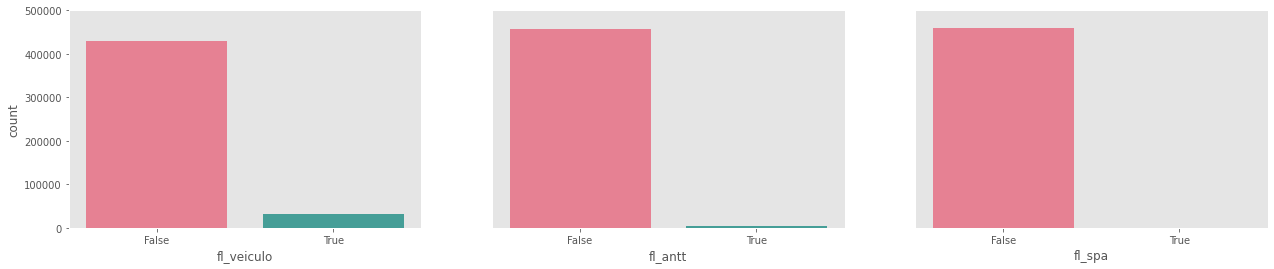

In [16]:
plt.style.use('ggplot')

plt.subplot(1,3,1)
plt.subplots_adjust(right = 2.9)
plt.grid(False)
sns.countplot(data['fl_veiculo'], palette="husl")
plt.ylim(0,500000)

plt.subplot(1,3,2)
plt.subplots_adjust(right = 2.9)
plt.grid(False)
sns.countplot(data['fl_antt'], palette="husl")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,3,3)
plt.grid(False)
sns.countplot(data['fl_spa'], palette="husl")
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("");

#### Firms' Activities

- There are a lot of juridical nature categories: 'de_natureza_juridica' and 'natureza_juridica_macro';
- 'fl_passivel_iss': true if the company performs any activity that is taxable under ISS - Tax under services;
- 'de_saude_tributaria': Green if all tax are OK, Red if none are OK, mas tem mto mais cor! será removida;
- There are a lot of categories in 'de_ramo_setor', 'nm_segmento' and 'nm_divisao' with information about practically the same subject.

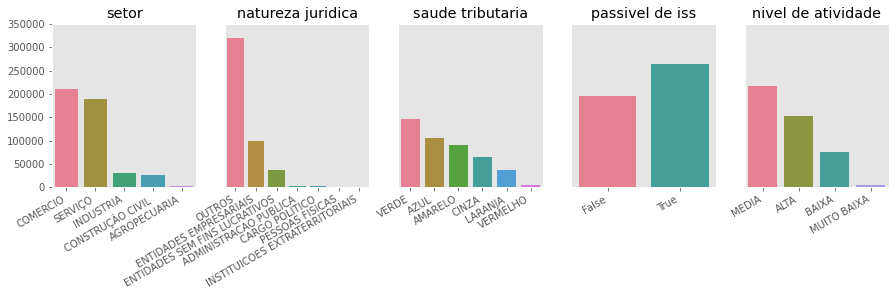

In [17]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['setor'], order=data['setor'].value_counts().index, palette="husl")
plt.title('setor')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,2)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['natureza_juridica_macro'], order=data['natureza_juridica_macro'].value_counts()
              .index, palette="husl")
plt.title('natureza juridica')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,3)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['de_saude_tributaria'], order=data['de_saude_tributaria'].value_counts()
              .index, palette="husl")
plt.title('saude tributaria')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,4)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['fl_passivel_iss'], palette="husl")
plt.title('passivel de iss')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,5)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['de_nivel_atividade'], order=data['de_nivel_atividade'].value_counts()
              .index, palette="husl")
plt.title('nivel de atividade')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right');

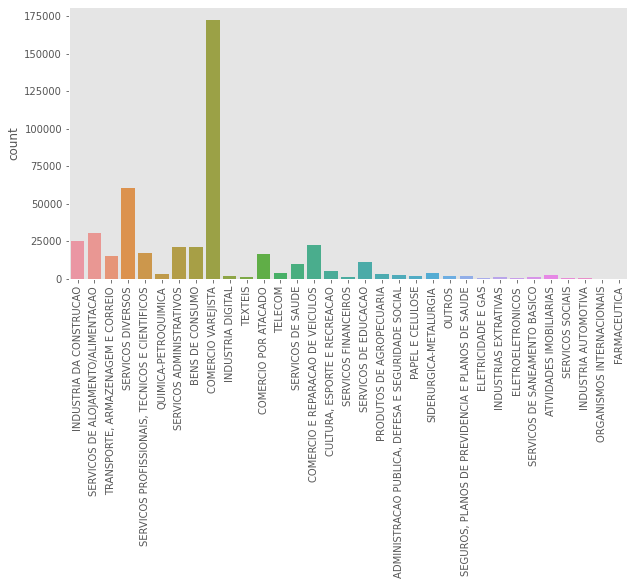

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.grid(False)
sns.countplot(data['de_ramo'])
plt.xticks(rotation=90)
plt.xlabel("");

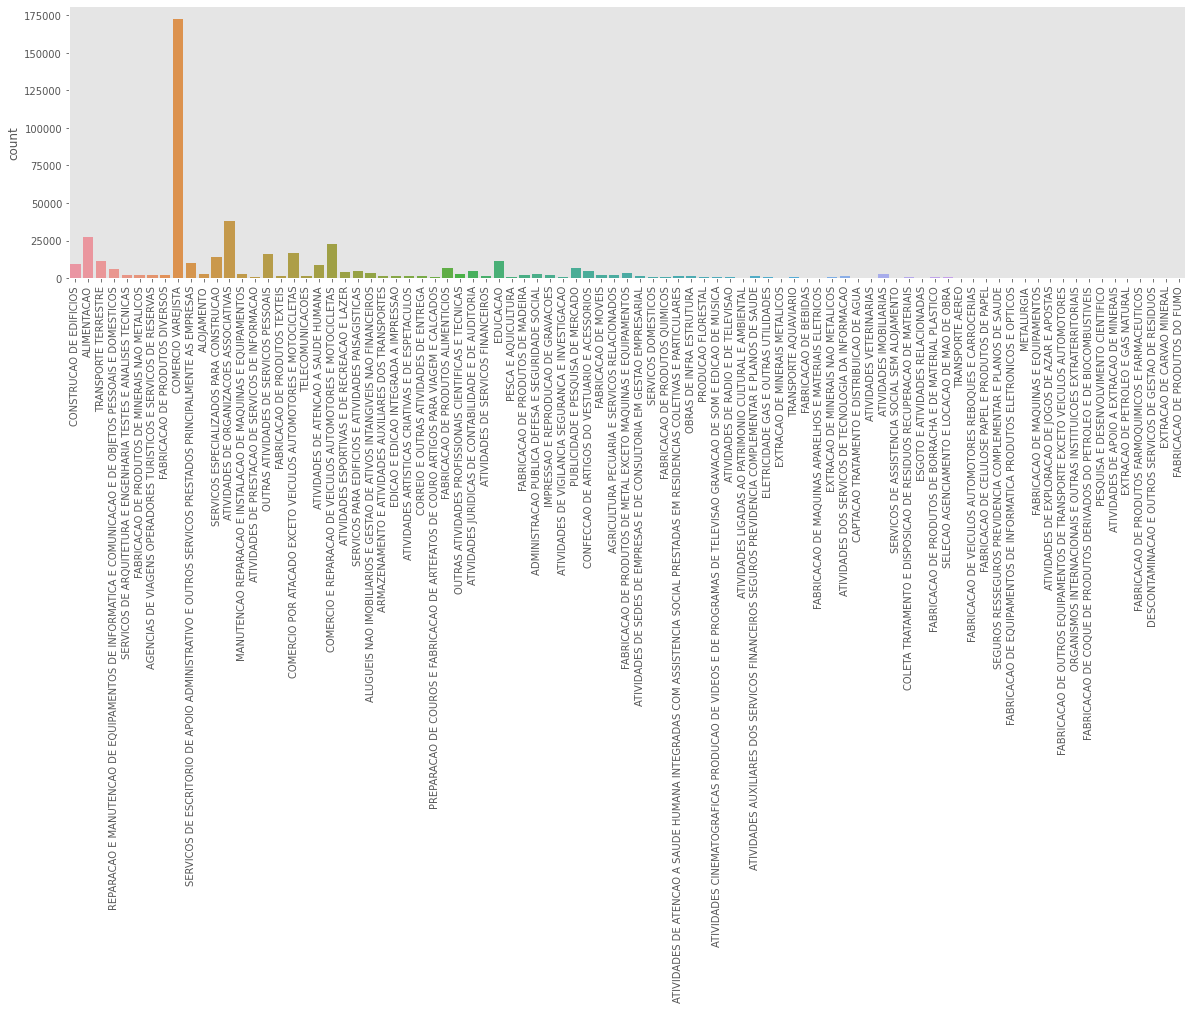

In [19]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['nm_divisao'])
plt.xticks(rotation=90)
plt.xlabel("");

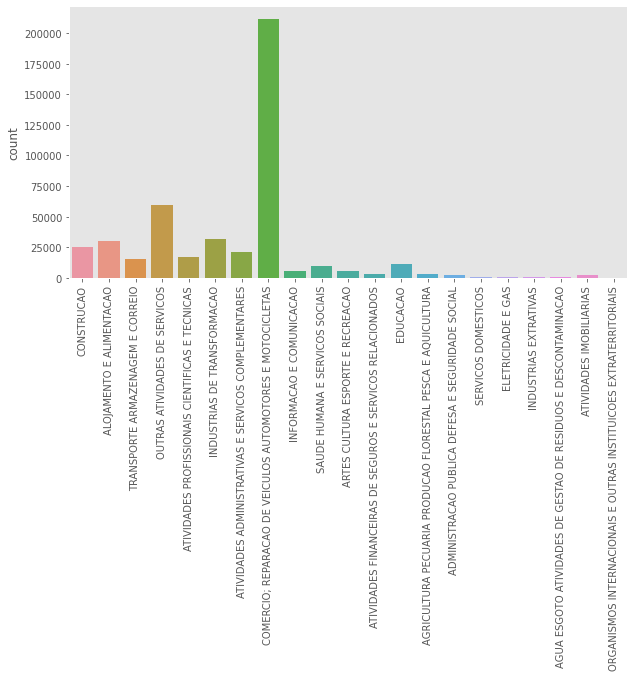

In [20]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['nm_segmento'])
plt.xticks(rotation=90)
plt.xlabel("");

In [21]:
print(data[data['setor'] == 'SERVIÇO']['fl_passivel_iss'].value_counts())

print('----------------------------------------')

print(data[data['fl_passivel_iss'] == True]['setor'].value_counts())

True     189260
False       384
Name: fl_passivel_iss, dtype: int64
----------------------------------------
SERVIÇO             189260
COMERCIO             40823
CONSTRUÇÃO CIVIL     25300
INDUSTRIA             8408
AGROPECUARIA           950
Name: setor, dtype: int64


#### Firms' Location

- nm_meso_regiao, nm_micro_regiao, sg_uf: firm's location;
- sg_uf_matriz: headquarters' location;
- nm_meso_regiao: it describes the firm's location;
- fl_rm: it tells if the firm is in the metropolitan region or not.

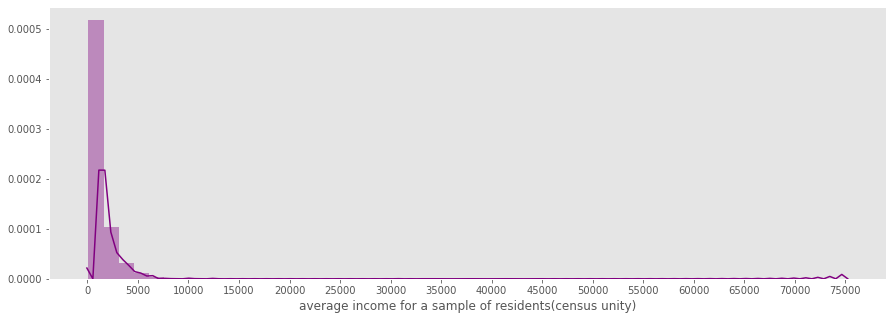

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.grid(False)
sns.distplot(data['empsetorcensitariofaixarendapopulacao'], color='purple')
plt.xlabel("average income for a sample of residents(census unity)")
plt.xticks(range(0,80000,5000));

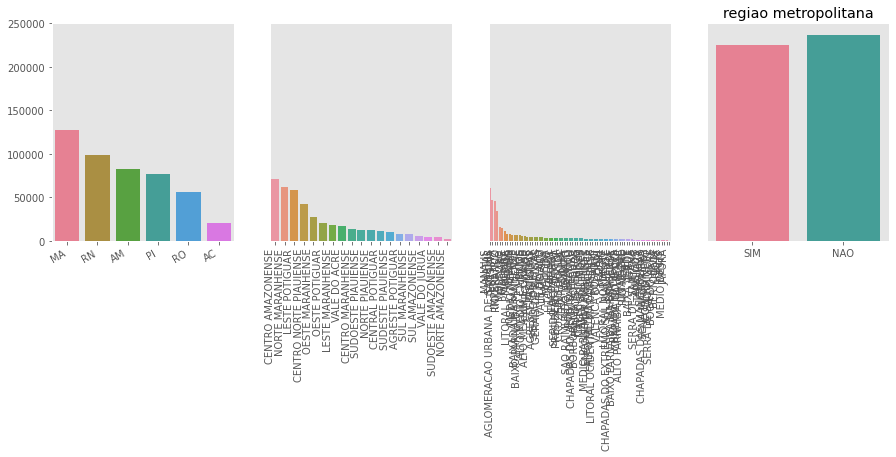

In [23]:
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['sg_uf'], order=data['sg_uf'].value_counts().index, palette="husl")
plt.ylim(0,250000)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=30, ha='right')

plt.subplot(1,4,2)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['nm_meso_regiao'], order=data['nm_meso_regiao'].value_counts().index)
plt.ylim(0,250000)
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90, ha='right')

plt.subplot(1,4,3)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['nm_micro_regiao'], order=data['nm_micro_regiao'].value_counts().index)
plt.ylim(0,250000)
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90, ha='right')

plt.subplot(1,4,4)
plt.style.use('ggplot')
plt.grid(False)
sns.countplot(data['fl_rm'], palette="husl")
plt.ylim(0,250000)
plt.yticks([])
plt.title('regiao metropolitana')
plt.xlabel("")
plt.ylabel("");

#### Firms' Partners

- We kept 'qt_socios' and 'idade_media_socios';
- We removed 'qt_socios_pj', 'qt_socios_pf', 'qt_socios_masculino', 'qt_socios_feminino' and
'qt_socios_st_regular', because these variables are autocorrelated;
- We removed 'idade_maxima_socios' and 'idade_minima_socios'.

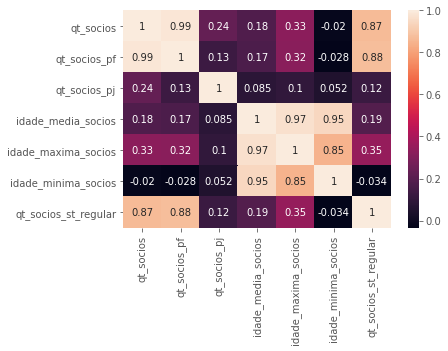

In [24]:
partners = data[['qt_socios', 'qt_socios_pf', 'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios',
                   'idade_minima_socios', 'qt_socios_st_regular']]

plt.style.use('ggplot')
plt.grid(False)
sns.heatmap(partners.corr(method='spearman'), annot=True);

In [25]:
(partners.isna().sum()/partners.shape[0]).sort_values(ascending=False)

qt_socios_st_regular    0.335102
idade_minima_socios     0.327931
idade_maxima_socios     0.327931
idade_media_socios      0.327931
qt_socios_pj            0.248954
qt_socios_pf            0.248954
qt_socios               0.248954
dtype: float64

#### Firms' Revenues

In [26]:
revenues = data[['vl_faturamento_estimado_grupo_aux', 'vl_faturamento_estimado_aux',
                'de_faixa_faturamento_estimado_grupo', 'de_faixa_faturamento_estimado']]

revenues.corr(method='spearman')

,vl_faturamento_estimado_grupo_aux,vl_faturamento_estimado_aux
vl_faturamento_estimado_grupo_aux,1.000000,0.924589
vl_faturamento_estimado_aux,0.924589,1.000000


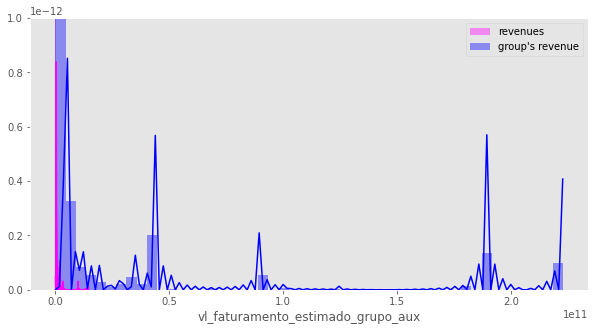

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.distplot(revenues['vl_faturamento_estimado_aux'], color='magenta')
plt.grid(False)
sns.distplot(revenues['vl_faturamento_estimado_grupo_aux'], color='blue')
plt.legend(['revenues',"group's revenue"]);

# Data Treatment

#### Treating categorical variables

In [28]:
def categorical(data):
    data['de_nivel_atividade'] = data['de_nivel_atividade'].map({'ALTA':4,'BAIXA':2,'MEDIA':3,'MUITO BAIXA':1})
    data['de_nivel_atividade'] = data['de_nivel_atividade'].fillna(0)
    data['fl_rm'] = data['fl_rm'].map({'SIM': True, 'NAO': False})
    data['fl_passivel_iss'] = data['fl_passivel_iss'].astype('bool')
    data['fl_optante_simei'] = data['fl_optante_simei'].astype('bool')
    data['fl_optante_simples'] = data['fl_optante_simples'].astype('bool')
    data['nm_meso_regiao'] = data['nm_meso_regiao'].fillna(0)
    
    for i in range(0, len(data)):
        if data.loc[i, 'nm_meso_regiao'] == 0:
            data.loc[i, 'nm_meso_regiao'] = data.loc[i, 'sg_uf']
            
    data['nm_divisao'] = data['nm_divisao'].fillna('OUTROS')
    data['nm_segmento'] = data['nm_segmento'].fillna('OUTROS')
    
    return data

In [29]:
data = categorical(data)

categorical = data.select_dtypes('object')

pd.DataFrame({'missing': categorical.isna().sum()/categorical.shape[0]*100,
              'types': categorical.dtypes,
              'uniques': categorical.nunique()}
            ).sort_values(by='missing', ascending=False)

,missing,types,uniques
nm_micro_regiao,12.697005,object,73
de_faixa_faturamento_estimado_grupo,5.951356,object,11
de_faixa_faturamento_estimado,5.951356,object,12
de_saude_tributaria,3.212430,object,6
sg_uf_matriz,0.419426,object,27
fl_antt,0.416831,object,2
fl_simples_irregular,0.416831,object,2
fl_veiculo,0.416831,object,2
fl_spa,0.416831,object,2
setor,0.416831,object,5


In [30]:
booleans = data.select_dtypes('bool')
pd.DataFrame({'missing': booleans.isna().sum()/booleans.shape[0]*100,
              'types': booleans.dtypes,
              'uniques': booleans.nunique()}
            ).sort_values(by='missing', ascending=False)

,missing,types,uniques
fl_matriz,0.0,bool,2
fl_me,0.0,bool,2
fl_sa,0.0,bool,2
fl_epp,0.0,bool,1
fl_mei,0.0,bool,2
fl_ltda,0.0,bool,2
fl_st_especial,0.0,bool,2
fl_rm,0.0,bool,2
fl_optante_simples,0.0,bool,2
fl_optante_simei,0.0,bool,2


#### Treating numerical variables

In [31]:
def numeric(data):
    data['idade_empresa_anos'] = data['idade_empresa_anos'].fillna(data.idade_empresa_anos.mean())
    data['vl_total_veiculos_pesados_grupo'] = data['vl_total_veiculos_pesados_grupo'].fillna(data.vl_total_veiculos_pesados_grupo.mean())
    data['vl_total_veiculos_leves_grupo'] = data['vl_total_veiculos_leves_grupo'].fillna(data.vl_total_veiculos_leves_grupo.mean())
    data['empsetorcensitariofaixarendapopulacao'] = data['empsetorcensitariofaixarendapopulacao'].fillna(data.empsetorcensitariofaixarendapopulacao.mean())
    data['qt_socios'] = data['qt_socios'].fillna(data.qt_socios.mean())
    data['vl_faturamento_estimado_grupo_aux'] = data['vl_faturamento_estimado_grupo_aux'].fillna(data.vl_faturamento_estimado_grupo_aux.mean())
    data['idade_media_socios'] = data['idade_media_socios'].fillna(data.idade_media_socios.mean())
    data['qt_filiais'] = data['qt_filiais'].fillna(data.qt_filiais.mean())
    
    return data

In [32]:
data = numeric(data)

numerics = data.select_dtypes('number')

pd.DataFrame({'missing': numerics.isna().sum()/numerics.shape[0]*100,
              'types': numerics.dtypes}
            ).sort_values(by='missing', ascending=False)

,missing,types
qt_socios_st_regular,33.510203,float64
idade_maxima_socios,32.793133,float64
idade_minima_socios,32.793133,float64
qt_socios_pf,24.895414,float64
qt_socios_pj,24.895414,float64
vl_faturamento_estimado_aux,5.951356,float64
idade_empresa_anos,0.000000,float64
vl_total_veiculos_pesados_grupo,0.000000,float64
vl_total_veiculos_leves_grupo,0.000000,float64
de_nivel_atividade,0.000000,float64


In [33]:
def padronize(data):
    scaler = StandardScaler()
    numerics = data.select_dtypes('number')
    num_trans = scaler.fit_transform(numerics)
    num_trans = pd.DataFrame(num_trans, columns=numerics.columns)
    categorical = data.drop(numerics.columns, axis=1)
    final = pd.concat([categorical, num_trans], axis=1)
    
    return final

In [34]:
data = padronize(data)
data.to_csv('treated_data.csv')

# The Model

In [35]:
data = pd.read_csv('treated_data.csv', index_col=0)
data.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,...,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,False,False,...,0.177374,0.160622,-0.10066,1.143401e-01,0.190653,-0.028384,0.234187,0.075165,-0.048349,-0.061322
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,False,False,...,-0.174786,-0.146308,-0.10066,-1.527994e+00,-1.245059,-1.147051,-0.153592,-0.019100,-0.048772,-0.061322
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,False,False,...,-0.174786,-0.146308,-0.10066,-1.044955e+00,-0.886131,-0.747527,NaN,-0.024261,-0.048795,-0.061322
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,False,False,...,-0.174786,-0.146308,-0.10066,-6.585232e-01,-0.598989,-0.427908,-0.153592,-0.019100,-0.048772,-0.061322
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,False,False,...,-0.174786,-0.146308,-0.10066,6.864405e-16,NaN,NaN,NaN,-0.019100,-0.048772,-0.061322


In [36]:
def k_means(data, n):
    k_means = KMeans(n)
    clusters = k_means.fit_predict(data)
    data['clusters'] = clusters
    
    return data

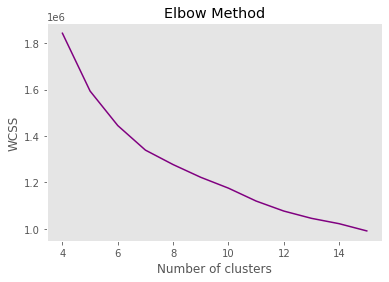

In [37]:
features = ['idade_empresa_anos', 'fl_rm', 'nm_segmento', 'vl_total_veiculos_pesados_grupo',
            'de_nivel_atividade', 'sg_uf', 'qt_socios','vl_faturamento_estimado_grupo_aux', 'qt_filiais']
X = data[features]
X_dummies = pd.get_dummies(X)
X_dummies.columns.nunique()

wcss = []

for i in range(4, 16, 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_dummies)
    wcss.append(kmeans.inertia_)

plt.style.use('ggplot')
plt.plot(range(4, 16, 1), wcss, color='purple')
plt.grid(False)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
def preModel(data):
    features = ['idade_empresa_anos', 'fl_rm', 'nm_segmento', 'vl_total_veiculos_pesados_grupo',
                'de_nivel_atividade', 'sg_uf', 'qt_socios',
                'vl_faturamento_estimado_grupo_aux', 'qt_filiais']
    
    X = data[features]
    
    X_dummies = pd.get_dummies(X)
    
    return X_dummies

In [39]:
X = preModel(data)

X.to_csv('premodel.csv')

X = pd.read_csv('premodel.csv', index_col=0)

X.head()

,idade_empresa_anos,fl_rm,vl_total_veiculos_pesados_grupo,de_nivel_atividade,qt_socios,vl_faturamento_estimado_grupo_aux,qt_filiais,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,...,nm_segmento_OUTROS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO
0,0.468908,True,-0.049577,1.073659,0.177374,-0.048349,-0.061322,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.882484,True,-0.049577,-1.238448,-0.174786,-0.048772,-0.061322,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.296966,True,-0.049577,-0.082394,-0.174786,-0.048795,-0.061322,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,-0.357370,True,-0.049577,-0.082394,-0.174786,-0.048772,-0.061322,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.701843,True,-0.049577,1.073659,-0.174786,-0.048772,-0.061322,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
clusters = k_means(X, 7)

id_cluster = pd.DataFrame({'id':data['id'],
                           'segment':data['nm_segmento'],
                           'clusters':clusters['clusters']})
id_cluster

,id,segment,clusters
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,CONSTRUCAO,4
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,ALOJAMENTO E ALIMENTACAO,2
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,TRANSPORTE ARMAZENAGEM E CORREIO,3
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,OUTRAS ATIVIDADES DE SERVICOS,3
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,4
...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,4
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,2
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,SAUDE HUMANA E SERVICOS SOCIAIS,0
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,4


In [41]:
id_cluster.to_csv('clusters.csv')

# Recommendations

In [42]:
def joinData(data, portfolio):
    portfolio = pd.DataFrame(portfolio.loc[:, 'id'])
    portfolio['firms'] = 1
    join_data = pd.merge(data, portfolio, how='outer', on='id')
    join_data = join_data.fillna(0)
    
    return join_data

In [86]:
firm1 = pd.read_csv('estaticos_portfolio1.csv', index_col=0)
firm2 = pd.read_csv('estaticos_portfolio2.csv', index_col=0)
firm3 = pd.read_csv('estaticos_portfolio3.csv', index_col=0)
print('Firm 1 has',firm1.shape[0],'client firms')
print('Firm 2 has',firm2.shape[0],'client firms')
print('Firm 3 has',firm3.shape[0],'client firms')

Firm 1 has 555 client firms
Firm 2 has 566 client firms
Firm 3 has 265 client firms


In [87]:
firm1 = joinData(id_cluster, firm1)
firm2 = joinData(id_cluster, firm2)
firm3 = joinData(id_cluster, firm3)

In [80]:
def clusterRec(data):
    data = data[data['firms'] == 1]
    rec = pd.DataFrame(data['clusters'].value_counts())
    rec.reset_index(inplace=True)
    cluster = rec.iloc[0, 0]
    
    return cluster

def recommendation(n, segment, data):
    cut0 = data[data['firms'] == 0]
    cut1 = cut0[cut0['segment'] == segment]
    cut2 = cut1[cut1.clusters == n]
    firms_rec = cut2.loc[:,'id']
    
    return list(firms_rec)

In [88]:
# Recommending the most common cluster for firm 1
cluster_rec1 = clusterRec(firm1)
cluster_rec2 = clusterRec(firm2)
cluster_rec3 = clusterRec(firm3)

#### Recommending based on the firm's segment and cluster

In [89]:
# Supposing we want recommendation of COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E
# MOTOCICLETAS for firm 1
segment = 'COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS'

firms_rec1 = recommendation(cluster_rec, segment, firm1)
firms_rec2 = recommendation(cluster_rec, segment, firm2)
firms_rec3 = recommendation(cluster_rec, segment, firm3)

print('It is possible to recommend',len(firms_rec1),'firms for firm 1')
print('It is possible to recommend',len(firms_rec2),'firms for firm 2')
print('It is possible to recommend',len(firms_rec3),'firms for firm 3')

It is possible to recommend 73649 firms for firm 1
It is possible to recommend 73832 firms for firm 2
It is possible to recommend 73832 firms for firm 3


In [91]:
print(firms_rec1[0:9])
print('-------------------------------------------------------------------------------------')
print(firms_rec2[0:9])
print('-------------------------------------------------------------------------------------')
print(firms_rec3[0:9])

['3d280e33e53e6fa5d63791f1eaf0207f2c079d1d7131759a3c7670c8e9df7c05', '459303e2f53eafe5c018c516d21f1cad65ab8a82c7214e0d7403e3cf38e6aa34', '4e663ebb51860ea4882099302347f35f3f255e184c3849247244a8f1d7bd7c16', '0032e3e6a776cbf4d36efa963b4eda224ddba8af284117273bbd7a2a9d374f96', 'e93a20892b53018debe7454c6a1525b3c387a4d8338b50468ffce3dc77bd3683', '6acac5f43577b3799265c3b3e1428d509caa7ce01ac2f2377e8b6ce730f87ebb', 'd2f2f2723c386baa708e713dfb5d9dee9b5a31912002dee8a7cde309ac80ec55', '7cef5ab577f4586a84645e84f40be0be3a8fe68dfdfcbaa48332d0f39f08870d', '37870e8dde9cc4bd82d6c1388062651cc517f446a3f8b38b85a5438d5b722c0f']
-------------------------------------------------------------------------------------
['3d280e33e53e6fa5d63791f1eaf0207f2c079d1d7131759a3c7670c8e9df7c05', '459303e2f53eafe5c018c516d21f1cad65ab8a82c7214e0d7403e3cf38e6aa34', '4e663ebb51860ea4882099302347f35f3f255e184c3849247244a8f1d7bd7c16', '0032e3e6a776cbf4d36efa963b4eda224ddba8af284117273bbd7a2a9d374f96', 'e93a20892b53018debe7454c6a1